In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('AQI_f.csv')

In [ ]:
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,O3,AQI,AQI_Bucket
0,DL012,26/09/17 16:00,114.33,138.57,15.40,30.73,0.0,0.90,73.94,164.0,Moderate
1,DL012,26/09/17 17:00,137.00,162.35,15.17,31.08,0.0,0.88,77.51,175.0,Moderate
2,DL012,26/09/17 18:00,109.99,135.96,15.42,30.70,0.0,0.90,73.76,180.0,Moderate
3,DL012,26/09/17 19:00,72.24,84.96,16.89,28.75,0.0,1.01,58.50,178.0,Moderate
4,DL012,26/09/17 20:00,48.96,58.08,22.77,23.74,0.0,1.45,33.71,173.0,Moderate


In [ ]:
df['AQI_Bucket'].value_counts()/len(df)*100

AQI_Bucket
Moderate        43.768196
Very Poor       21.098599
Satisfactory    15.221093
Poor            15.182642
Severe           4.350453
Good             0.379017
Name: count, dtype: float64

In [ ]:
df['AQI_Bucket']=df['AQI_Bucket'].replace({'Very Poor':'Poor','Severe':'Poor','Satisfactory':'Good'})

In [ ]:
df['AQI_Bucket'].value_counts()/len(df)*100

AQI_Bucket
Moderate    43.768196
Poor        40.631695
Good        15.600110
Name: count, dtype: float64

In [ ]:
df_exp_AQI_Bucket=df[['PM2.5','PM10','NO','NO2','NOx','CO','O3']]

In [ ]:
def summary(df):
    summ=pd.DataFrame(df.dtypes,columns=['Data Type'])
    summ['#Missing']=df.isna().sum().values
    summ['Unique']=df.nunique().values
    desc=pd.DataFrame(df.describe(include='all').transpose())
    summ['min']=desc['min'].values
    summ['max']=desc['max'].values
    summ['mean']=desc['mean'].values
    summ['std']=desc['std'].values
    return summ
summary(df_exp_AQI_Bucket)

,Data Type,#Missing,Unique,min,max,mean,std
PM2.5,float64,0,11543,0.13,955.54,90.912210,85.140222
PM10,float64,0,14165,0.18,992.55,196.153349,136.019413
NO,float64,0,6605,0.02,456.48,34.528532,50.818282
NO2,float64,0,6450,0.02,482.89,32.837214,27.221142
NOx,float64,0,8939,0.00,498.28,65.936999,66.616703
CO,float64,0,570,0.00,40.25,1.163427,1.088473
O3,float64,0,5700,0.29,190.25,25.480916,17.882805


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

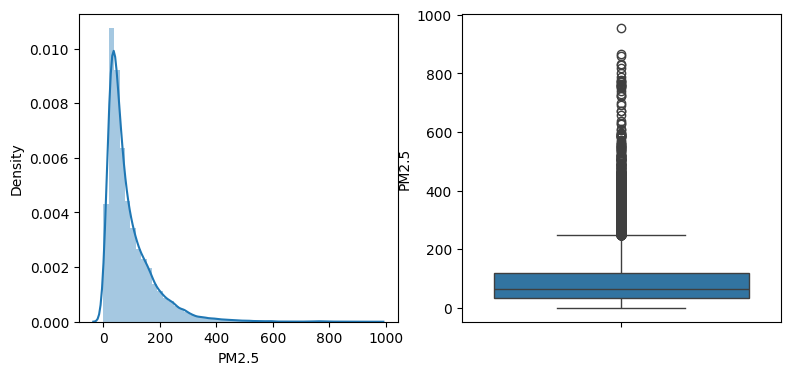

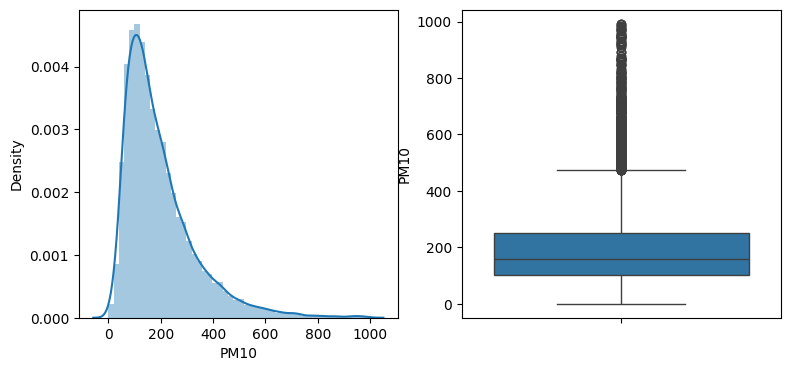

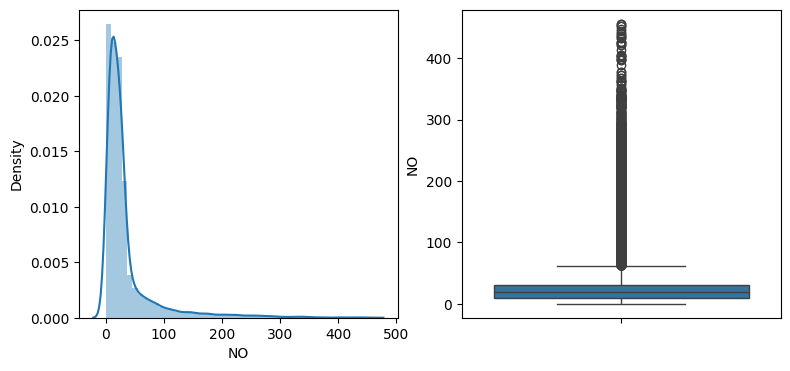

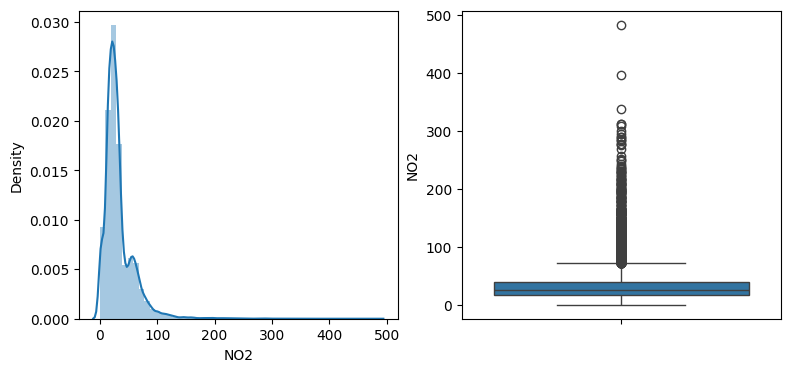

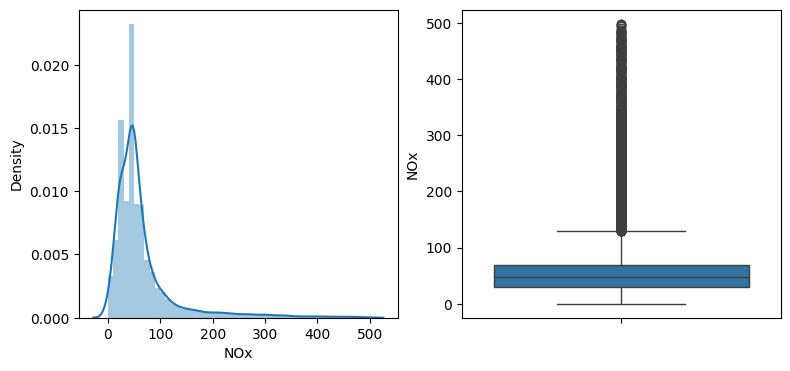

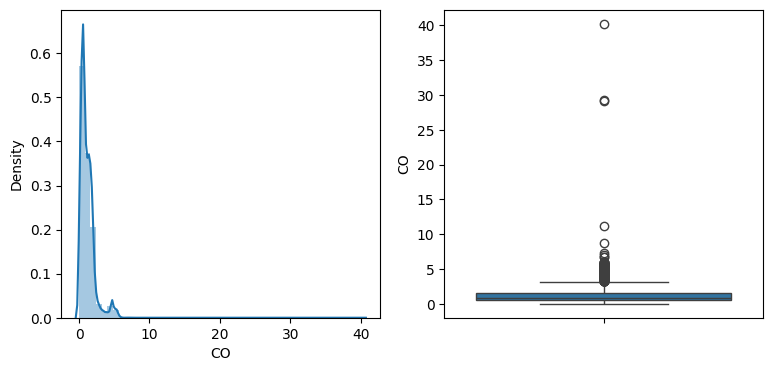

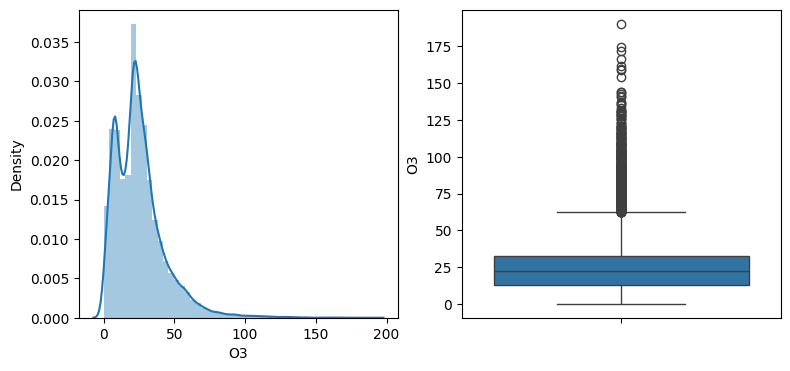

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in df_exp_AQI_Bucket.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[i])
    plt.subplot(132)
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df_t1=df[['PM2.5','PM10','NO','NO2','NOx','CO','O3','AQI_Bucket']]

In [ ]:
mapping = {
    "Moderate": 1,
    "Poor": 2,
    "Good": 3
}
df_t1['AQI_Bucket']=df['AQI_Bucket'].map(mapping)

In [ ]:
df_t1.head()

,PM2.5,PM10,NO,NO2,NOx,CO,O3,AQI_Bucket
0,114.33,138.57,15.40,30.73,0.0,0.90,73.94,1
1,137.00,162.35,15.17,31.08,0.0,0.88,77.51,1
2,109.99,135.96,15.42,30.70,0.0,0.90,73.76,1
3,72.24,84.96,16.89,28.75,0.0,1.01,58.50,1
4,48.96,58.08,22.77,23.74,0.0,1.45,33.71,1


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
features=df_t1.drop('AQI_Bucket',axis=1).columns

In [ ]:
X=ss.fit_transform(df_t1.drop('AQI_Bucket',axis=1))
X=pd.DataFrame(X, columns=features)

In [ ]:
X

,PM2.5,PM10,NO,NO2,NOx,CO,O3
0,0.275057,-0.423358,-0.376421,-0.077413,-0.989824,-0.242022,2.709889
1,0.541331,-0.248525,-0.380947,-0.064555,-0.989824,-0.260397,2.909528
2,0.224081,-0.442547,-0.376027,-0.078515,-0.989824,-0.242022,2.699823
3,-0.219317,-0.817504,-0.347100,-0.150153,-0.989824,-0.140960,1.846466
4,-0.492756,-1.015128,-0.231390,-0.334206,-0.989824,0.263287,0.460180
...,...,...,...,...,...,...,...
18200,-0.625482,-0.620468,-0.604298,-0.527811,-0.655214,-0.545207,2.919034
18201,-0.657900,-0.600544,-0.623583,-0.579610,-0.691092,-0.471708,2.601402
18202,-0.657665,-0.602823,-0.623386,-0.484461,-0.652062,-0.379833,2.007519
18203,-0.573919,-0.509966,-0.577535,-0.343390,-0.559440,-0.361458,3.737720


In [ ]:
Y=df_t1[['AQI_Bucket']]

In [ ]:
Y

,AQI_Bucket
0,1
1,1
2,1
3,1
4,1
...,...
18200,1
18201,1
18202,1
18203,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
m3=GaussianNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

In [ ]:
models = []
accuracy_scores = []

In [ ]:
def train_and_evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print('-'*50)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    acc=accuracy_score(y_test,y_pred)

    models.append(model)
    accuracy_scores.append(acc)

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.59      0.58      2375
           2       0.83      0.54      0.65      2223
           3       0.45      0.83      0.59       864

    accuracy                           0.61      5462
   macro avg       0.62      0.65      0.61      5462
weighted avg       0.66      0.61      0.61      5462

--------------------------------------------------


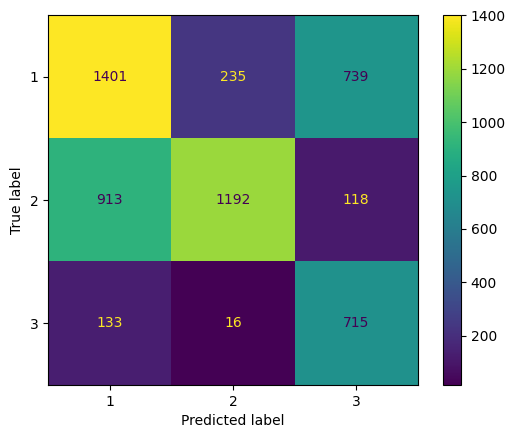

In [ ]:
train_and_evaluate_model(m3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
params = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), params, cv=5, verbose=1, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
m2=KNeighborsClassifier(n_neighbors=7,metric='manhattan',weights='distance')

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.81      0.78      2375
           2       0.86      0.81      0.83      2223
           3       0.77      0.72      0.75       864

    accuracy                           0.80      5462
   macro avg       0.79      0.78      0.79      5462
weighted avg       0.80      0.80      0.80      5462

--------------------------------------------------


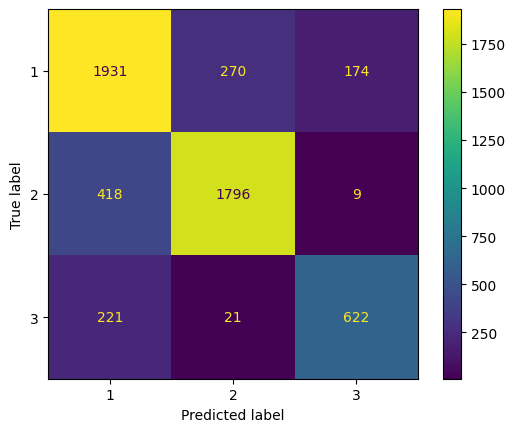

In [ ]:
train_and_evaluate_model(m2)

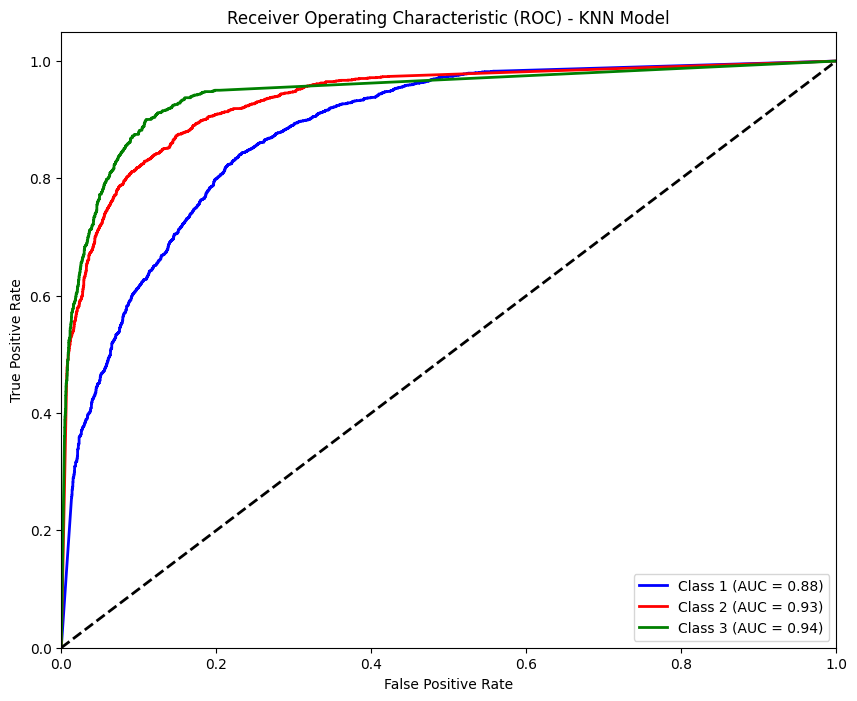

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = m2.predict_proba(X_test)

classes = [1, 2, 3]
y_test_binarized = label_binarize(y_test, classes=classes)

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - KNN Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
para_lr={'multi_class':['multinomial'], 'C':np.logspace(-4, 4, 20),
         'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
        'class_weight':['balanced'],'penalty': ['l2','l1','elasticnet']}

In [ ]:
grid_search_lr = GridSearchCV(LogisticRegression(), para_lr,cv=15, verbose=1, scoring='accuracy')

In [ ]:
grid_search_lr.fit(X_train, y_train)

Fitting 15 folds for each of 240 candidates, totalling 3600 fits


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameters:", grid_search_lr.best_params_)

Best parameters: {'C': 11.288378916846883, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
m_lr=LogisticRegression(C=11.288378916846883,class_weight='balanced',multi_class='multinomial'
                       ,penalty='l2',solver='saga',max_iter=10000)

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.58      0.62      2375
           2       0.80      0.71      0.75      2223
           3       0.50      0.83      0.62       864

    accuracy                           0.67      5462
   macro avg       0.66      0.71      0.67      5462
weighted avg       0.70      0.67      0.68      5462

--------------------------------------------------


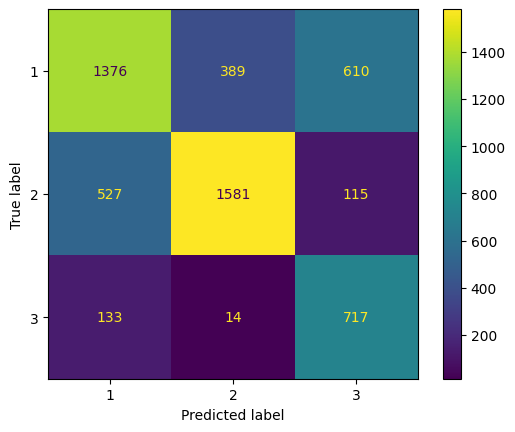

In [ ]:
train_and_evaluate_model(m_lr)

In [ ]:
df_t_sm=df[['PM2.5','PM10','NO','NO2','NOx','CO','O3','AQI_Bucket']]

In [ ]:
df_t_sm.head()

,PM2.5,PM10,NO,NO2,NOx,CO,O3,AQI_Bucket
0,114.33,138.57,15.40,30.73,0.0,0.90,73.94,Moderate
1,137.00,162.35,15.17,31.08,0.0,0.88,77.51,Moderate
2,109.99,135.96,15.42,30.70,0.0,0.90,73.76,Moderate
3,72.24,84.96,16.89,28.75,0.0,1.01,58.50,Moderate
4,48.96,58.08,22.77,23.74,0.0,1.45,33.71,Moderate


In [ ]:
df_t_sm['AQI_Bucket']=df_t_sm['AQI_Bucket'].replace({'Very Poor':'Poor','Severe':'Poor','Satisfactory':'Good'})

In [ ]:
df_t_sm['AQI_Bucket'].value_counts()/len(df)*100

AQI_Bucket
Moderate    43.768196
Poor        40.631695
Good        15.600110
Name: count, dtype: float64

In [ ]:
mapping = {
    "Moderate": 1,
    "Poor": 2,
    "Good": 3
}
df_t_sm['AQI_Bucket']=df_t_sm['AQI_Bucket'].map(mapping)

In [ ]:
df_t_sm['AQI_Bucket'].value_counts()/len(df)*100

AQI_Bucket
1    43.768196
2    40.631695
3    15.600110
Name: count, dtype: float64

In [ ]:
features_sm=df_t_sm.drop('AQI_Bucket',axis=1).columns

In [ ]:
X_sm=ss.fit_transform(df_t_sm.drop('AQI_Bucket',axis=1))
X_sm=pd.DataFrame(X, columns=features_sm)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_sm=df_t_sm[['AQI_Bucket']]

In [ ]:
sm=SMOTE()

In [ ]:
X_sm,y_sm=sm.fit_resample(X_sm,y_sm)

In [ ]:
y_sm.value_counts()

AQI_Bucket
1             7968
2             7968
3             7968
Name: count, dtype: int64

In [ ]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)

In [ ]:
grid_search_lr.fit(X_sm_train, y_sm_train)

Fitting 15 folds for each of 240 candidates, totalling 3600 fits


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameters:", grid_search_lr.best_params_)

In [ ]:
m_lr_sm=LogisticRegression(C=0.615848211066026,class_weight='balanced',multi_class='multinomial'
                       ,penalty='l1',solver='saga',max_iter=10000)

In [ ]:
models = []
accuracy_scores = []

In [ ]:
def train_and_evaluate_model(model):
    model.fit(X_sm_train,y_sm_train)
    y_sm_pred=model.predict(X_sm_test)
    print("Classification Report")
    print(classification_report(y_sm_test,y_sm_pred))
    print('-'*50)
    ConfusionMatrixDisplay.from_predictions(y_sm_test,y_sm_pred)
    acc=accuracy_score(y_sm_test,y_sm_pred)

    models.append(model)
    accuracy_scores.append(acc)

Classification Report
              precision    recall  f1-score   support

           1       0.59      0.57      0.58      2427
           2       0.79      0.70      0.75      2332
           3       0.73      0.84      0.78      2413

    accuracy                           0.70      7172
   macro avg       0.70      0.70      0.70      7172
weighted avg       0.70      0.70      0.70      7172

--------------------------------------------------


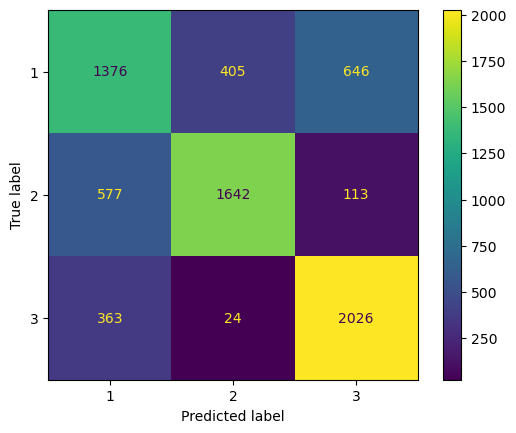

In [ ]:
train_and_evaluate_model(m_lr_sm)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.83      0.78      2375
           2       0.86      0.79      0.82      2223
           3       0.80      0.69      0.74       864

    accuracy                           0.79      5462
   macro avg       0.80      0.77      0.78      5462
weighted avg       0.80      0.79      0.79      5462

--------------------------------------------------


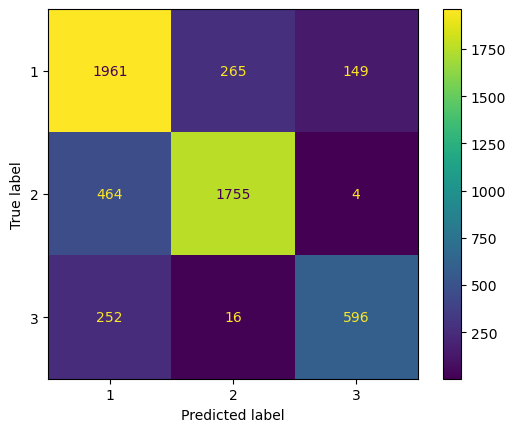

In [ ]:
train_and_evaluate_model(StackingClassifier(estimators=[('RF',RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=10,max_features=None,min_samples_split=5)),
                                                       ],final_estimator=LogisticRegression()))